### This jupyter notebook is to unit-test CFE model run

## Preparation

In [10]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [11]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/forcing_daily_1998_2001.csv", 
    "time_step_size": 86400,
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 15.51641379459915,
        "satdk": 0.05320015043038475,
        "satpsi": 0.2556788156289219,
        "slop": 0.8787762760574138,
        "smcmax": 0.5192799797242945,
        "wltsmc": 0.27657173584184713,
        "D": 1
        }, 
        "max_gw_storage": 0.13325325786225817,
        "Cgw": 0.0013836053743753002,
        "expon": 5.583344223843243,
        "K_nash": 0.3147599723095111,
        "refkdt": 2957.551426388539,
        "trigger_z_fact": 0.5195284467730682,
        "alpha_fc": 0.14736848037617004,
        "K_lf": 0.996,
        "num_nash_storage": 10,
        "giuh_ordinates": [0.5, 0.5], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_daily_1998_2001_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

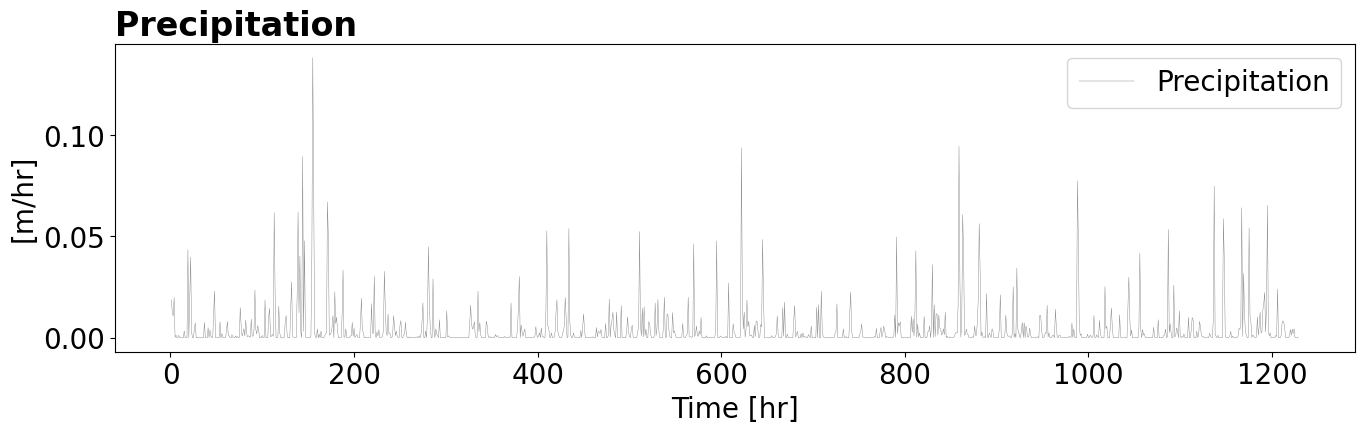

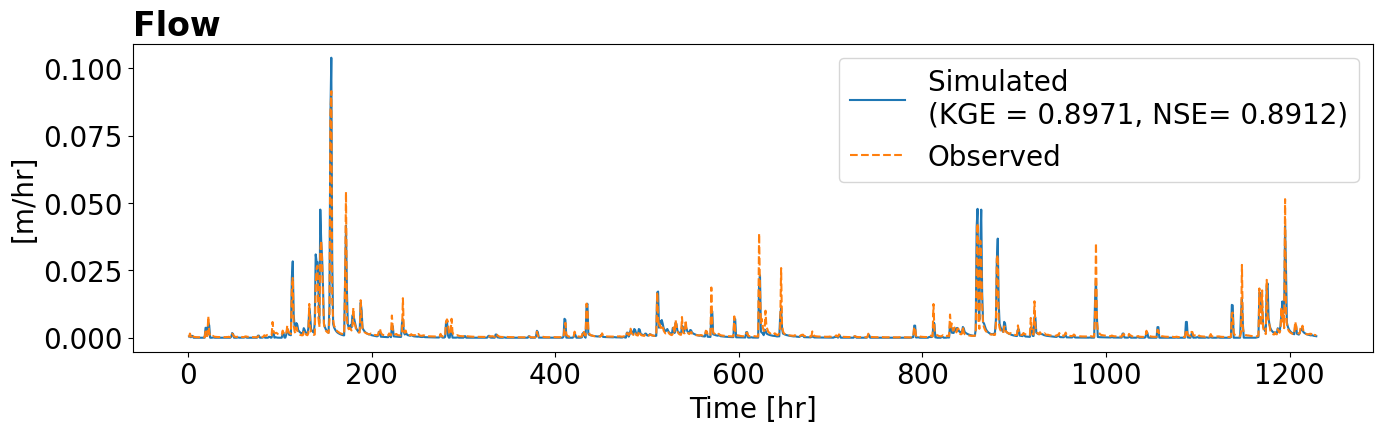

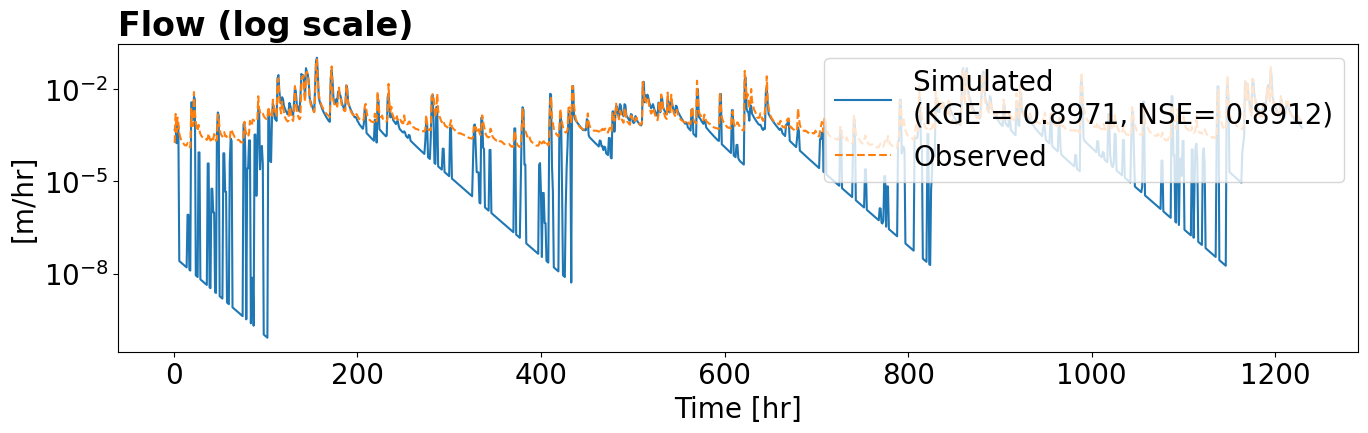

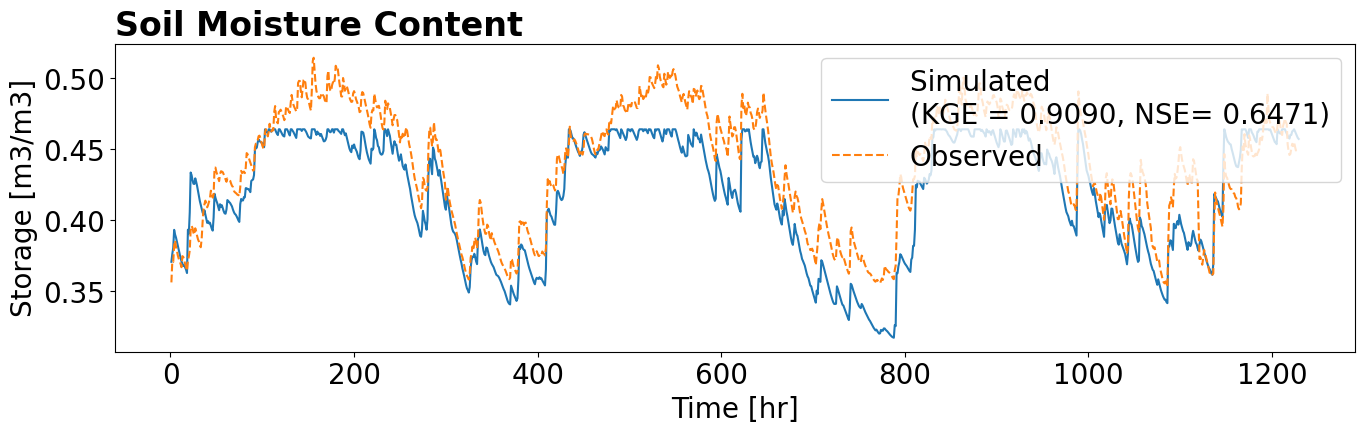

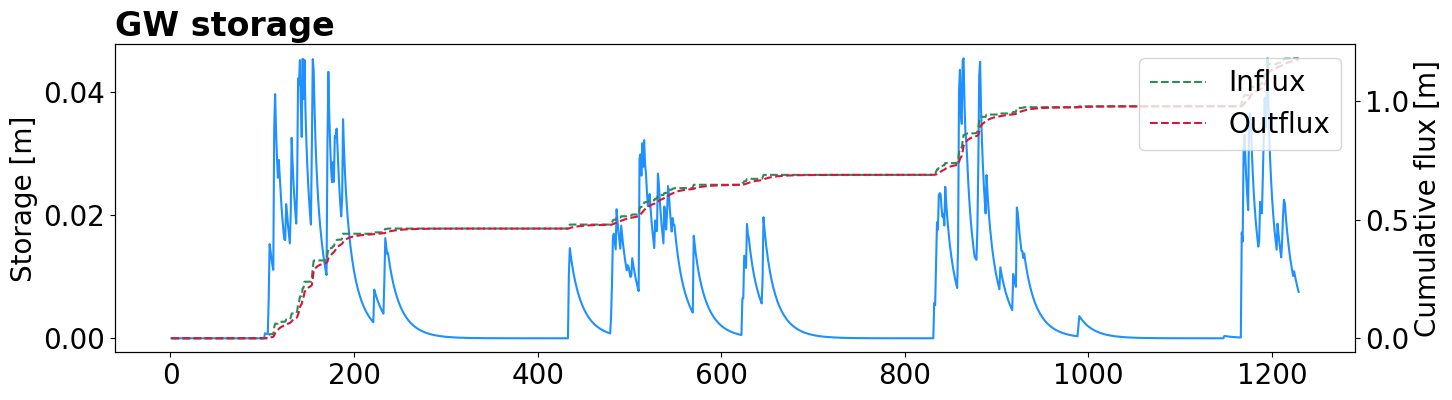

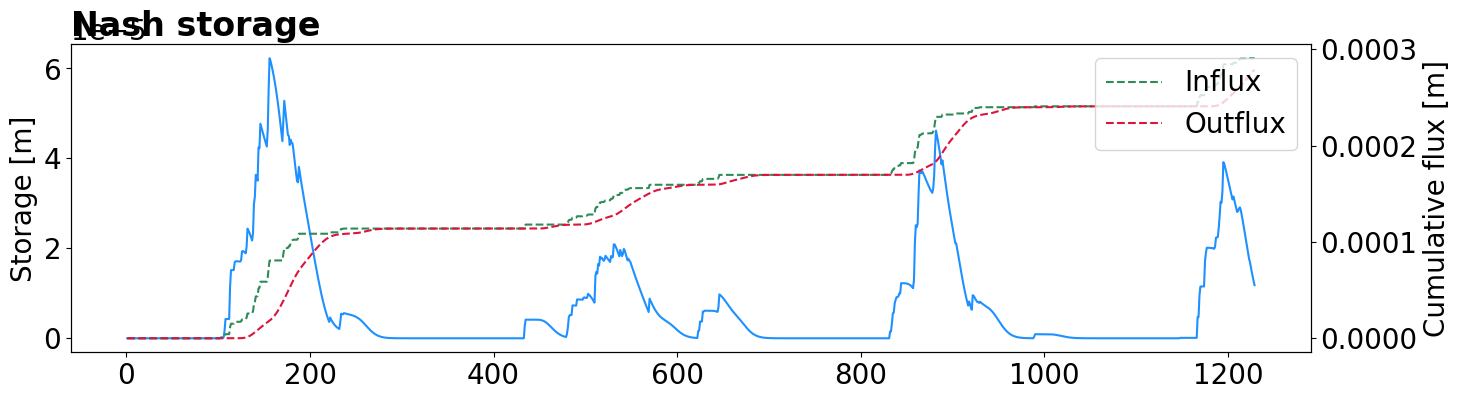

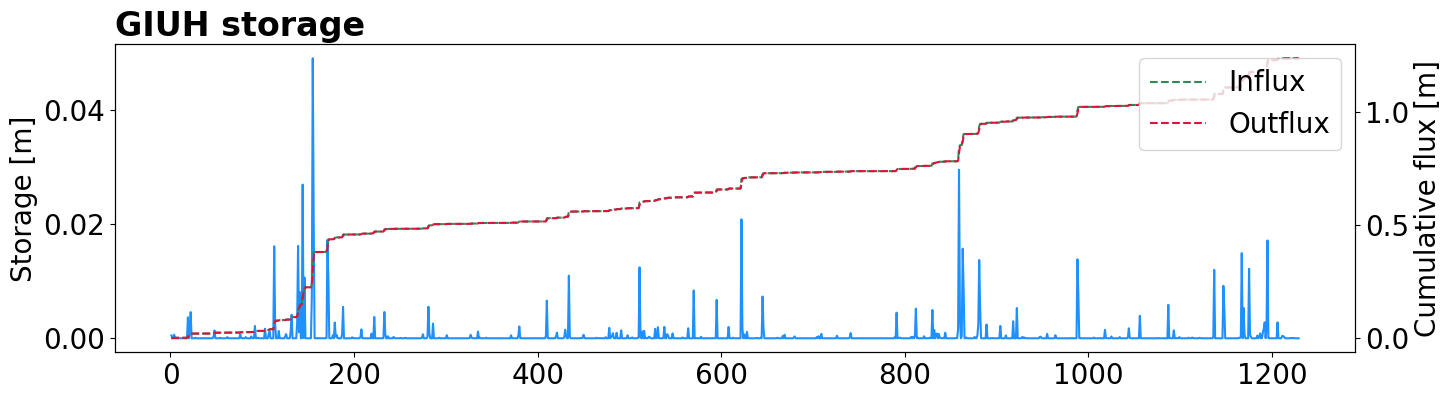


GLOBAL MASS BALANCE
      initial volume:   0.3594
        volume input:   5.9829
       volume output:   5.8483
        final volume:   0.4940
            residual: -4.3754e-06

 Discharge details
Cumulative discharge: 2.72
        Runoff ratio: 0.46
      Surface runoff: 0.51
  Deep GW to channel: 0.49
        Lateral flow: 0.00

 AET & PET
      volume PET:   4.0315
      volume AET:   3.1233
ET from rainfall:   1.2753
    ET from soil:   1.8480

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   1.2753
  surface runoff:   1.3942
             IOF:   1.3942
             SOF:   0.0000
    infiltration:   3.3134
schaake residual: -3.9968e-15

GIUH MASS BALANCE
  vol. into giuh:   1.3942
   vol. out giuh:   1.3942
 vol. end giuh q:   0.0000
   giuh residual: -4.3754e-06

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.3594
  vol. into soil:   3.3134
vol.soil2latflow:   0.0003
 vol. soil to gw:   1.3627
 vol. soil to ET:   1.8480
 final vol. soil:   0

In [12]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1230)),
    warm_up=True,
    warmup_offset=400,
    warmup_iteration=20
)
cfe_instance.finalize(print_mass_balance=True)